Work analysis script
-------------------


John Chodera, Dom Rufa, Hannah Bruce Macdonald

In [19]:
import os
import numpy as np
import seaborn as sns
from pymbar import BAR
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from glob import glob
import pickle
from simtk.openmm import unit

In [4]:
with open('/Users/brucemah/Downloads/work.pkl', 'rb') as infile:
    work = pickle.load(infile)
    
# Plot by RUN
projects = {
    'complex' : 'PROJ13402',
    'solvent' : 'PROJ13403'
}
GEN = 'GEN0'

phase = 'complex'
PROJ = projects[phase]
run_index = 0
NRUNS = len(work[PROJ])

In [5]:
### TODO - unhardcode this

details = np.load('Thrombin_results.npy',allow_pickle=True).flatten()[0]

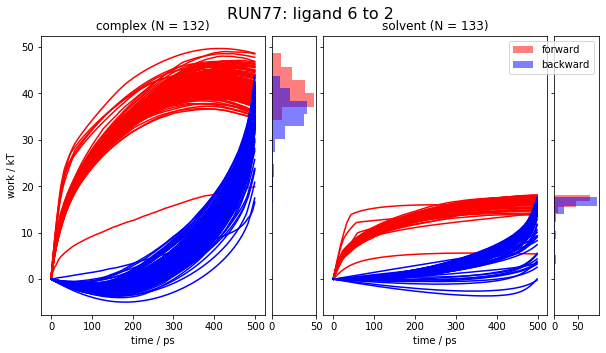

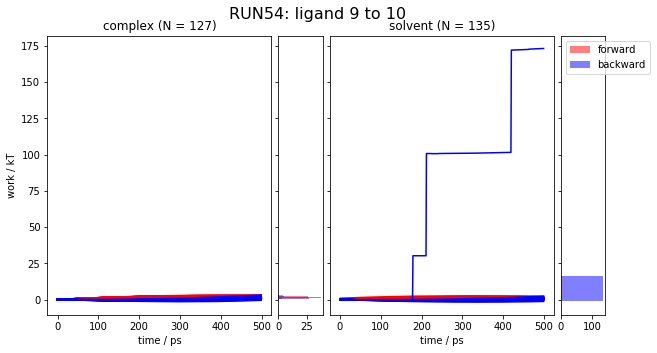

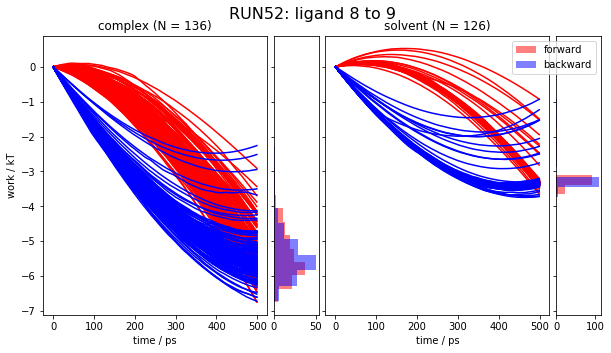

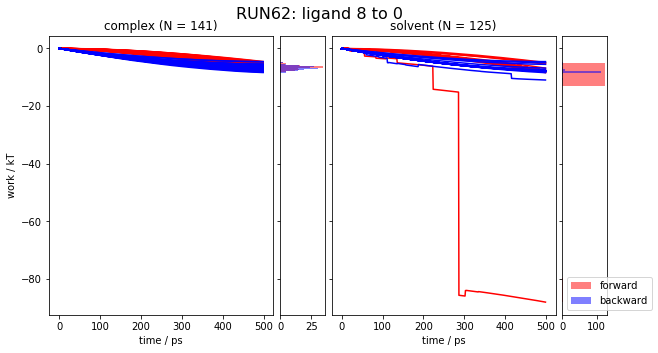

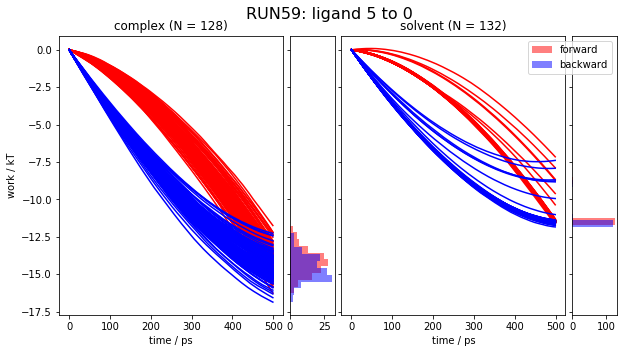

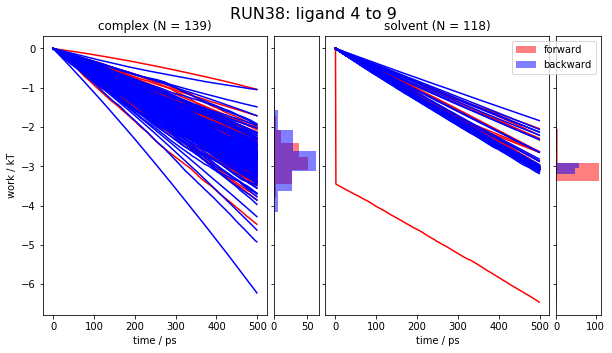

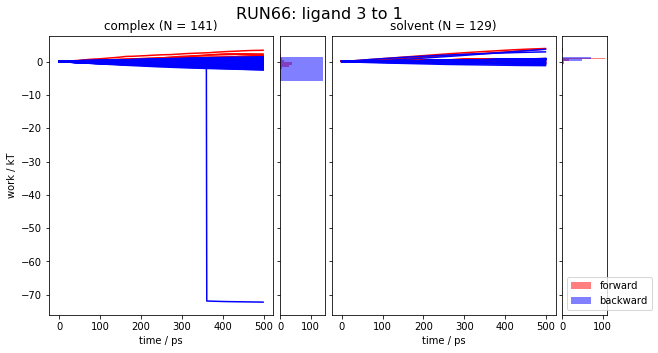

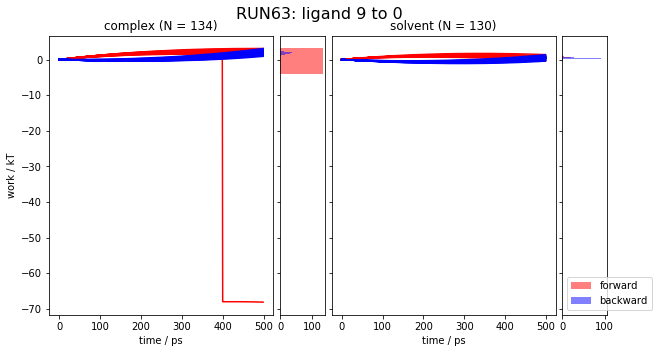

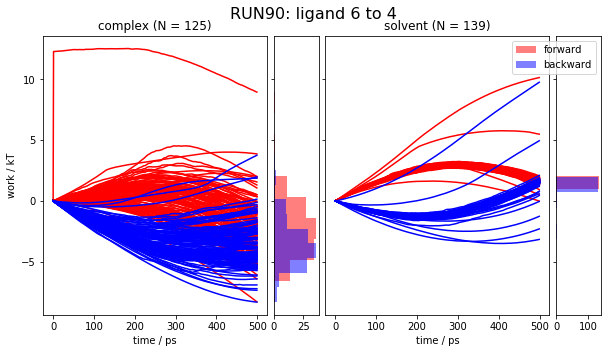

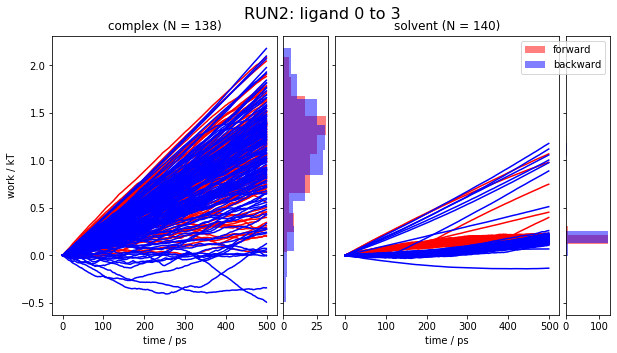

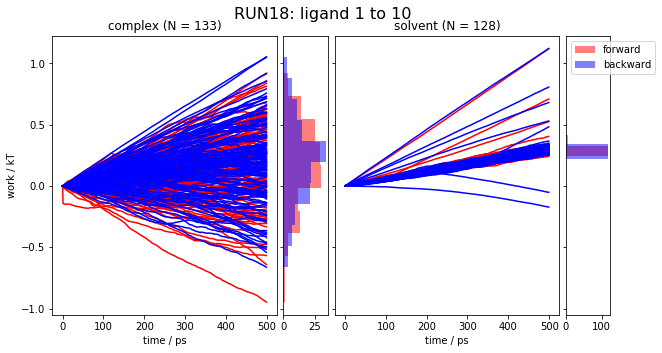

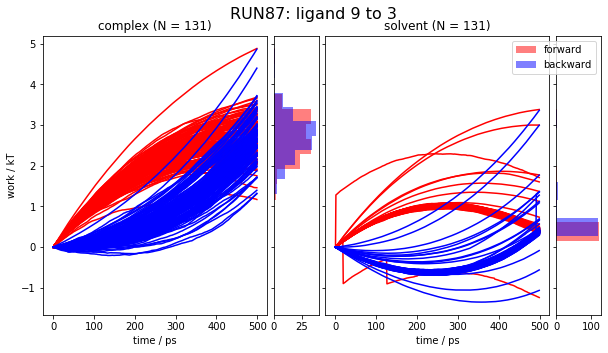

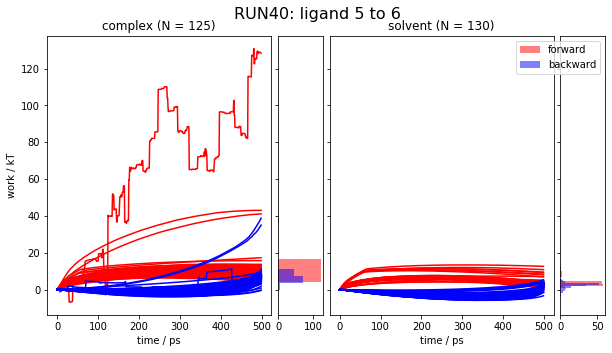

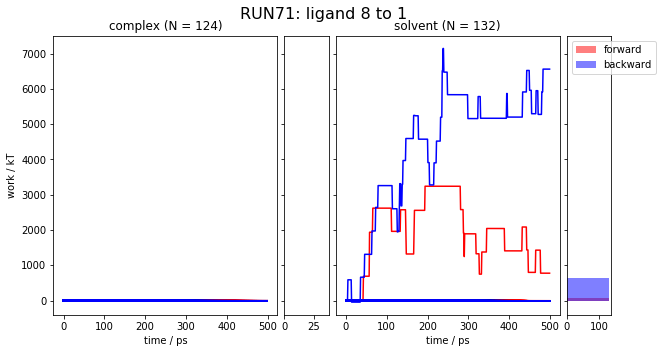

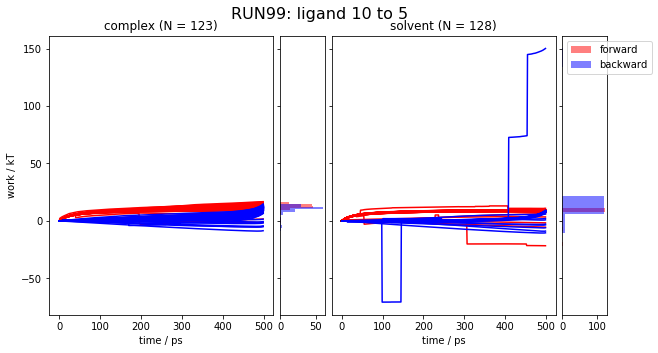

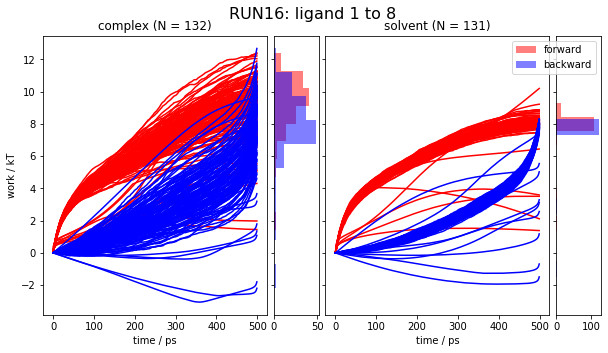

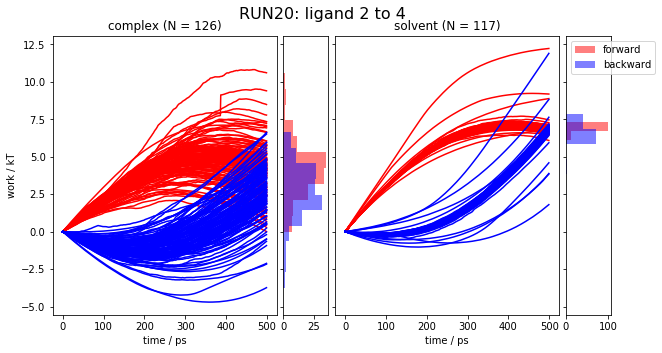

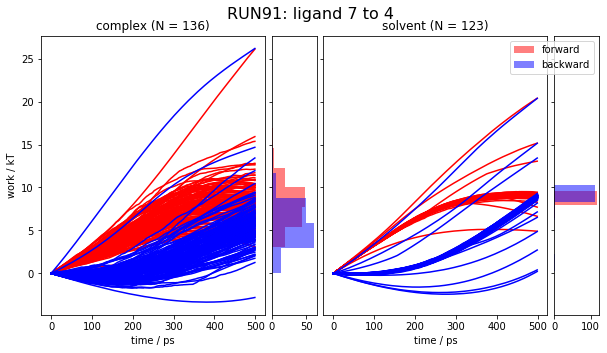

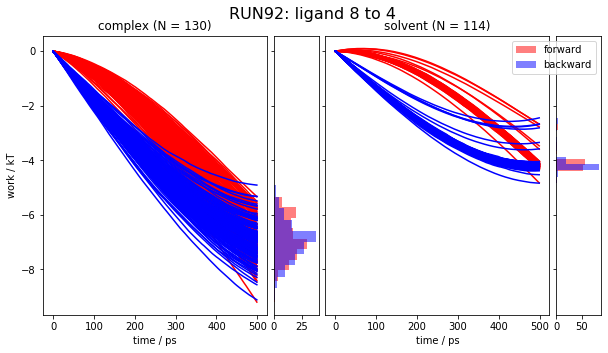

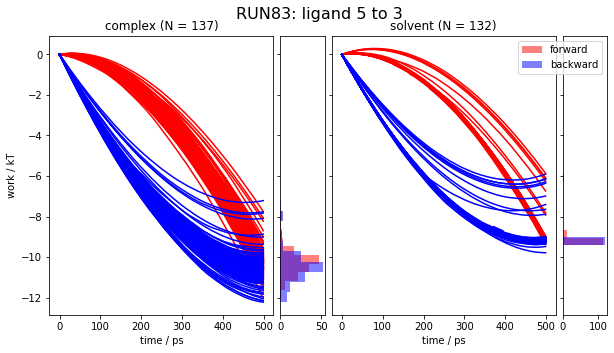

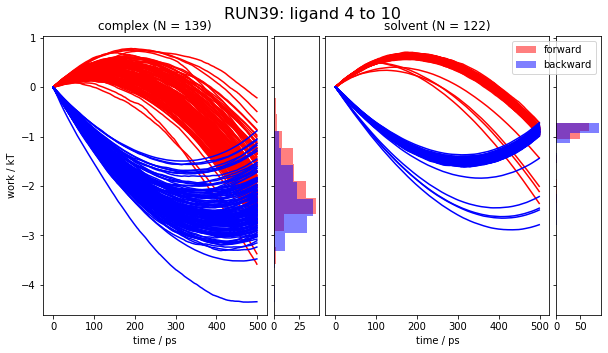

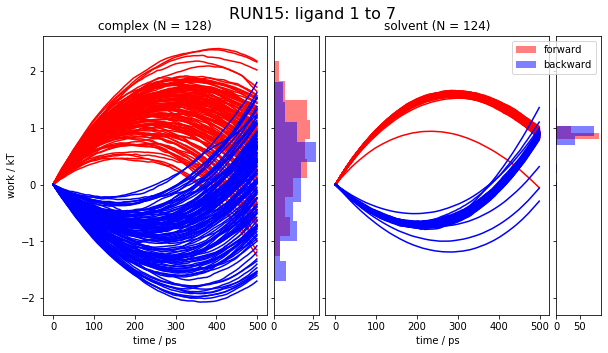

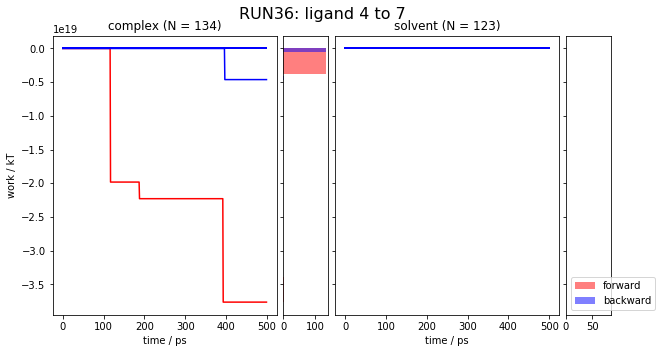

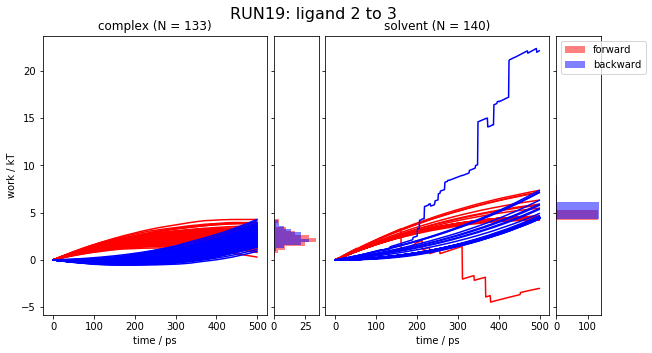

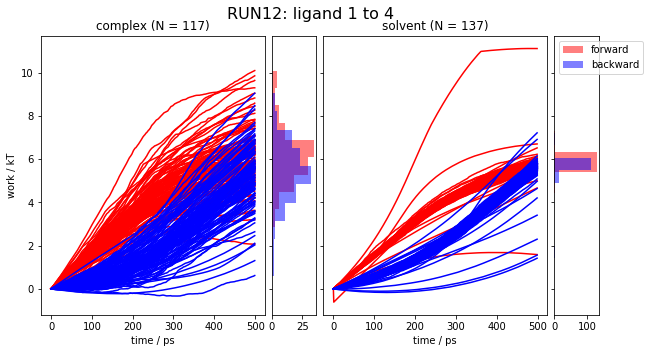

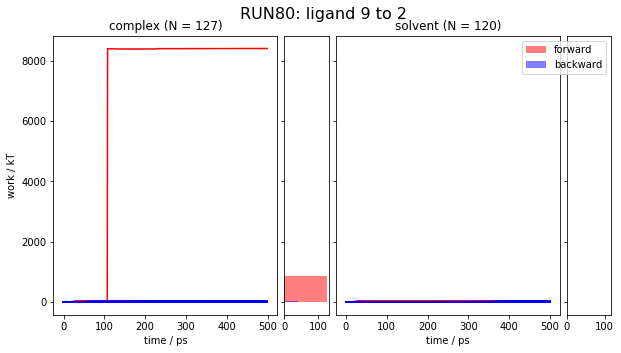

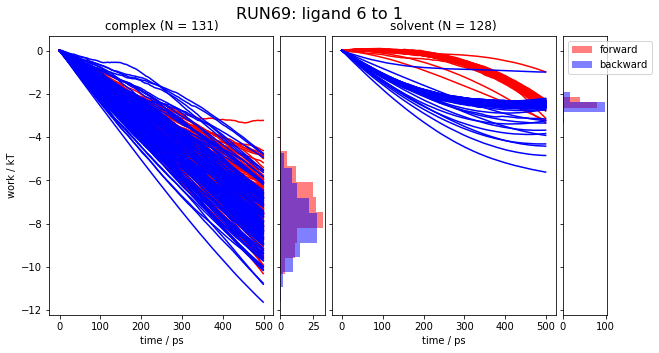

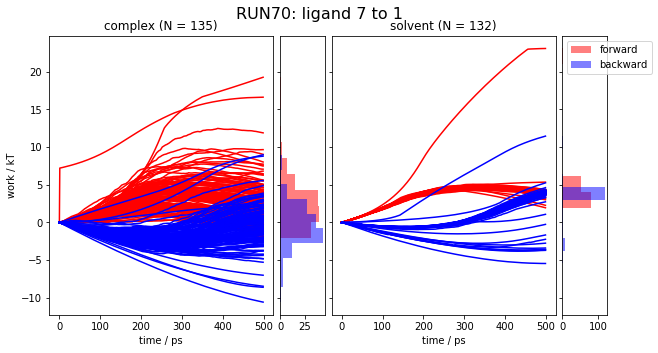

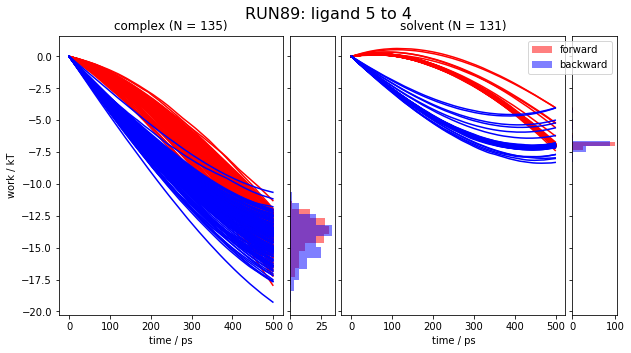

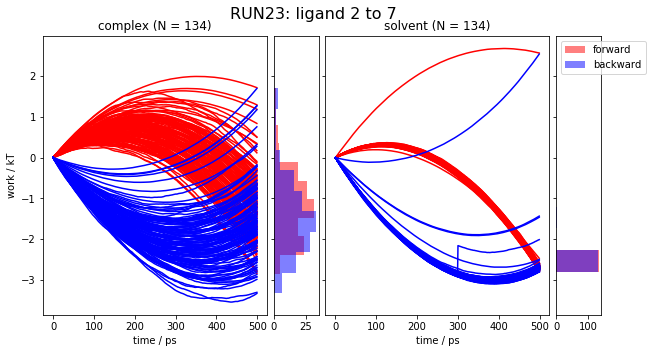

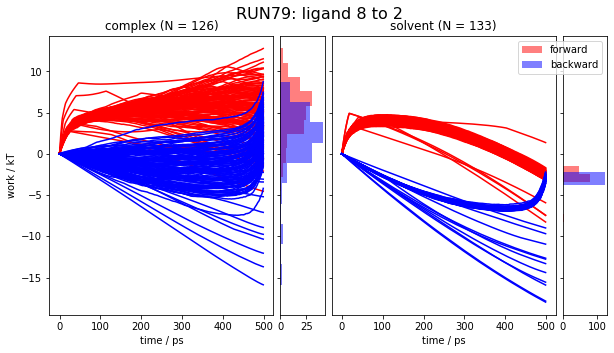

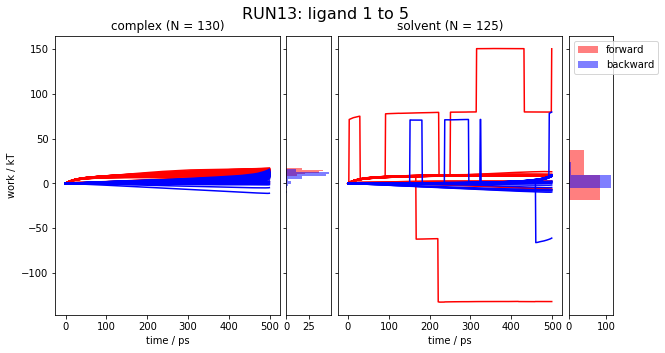

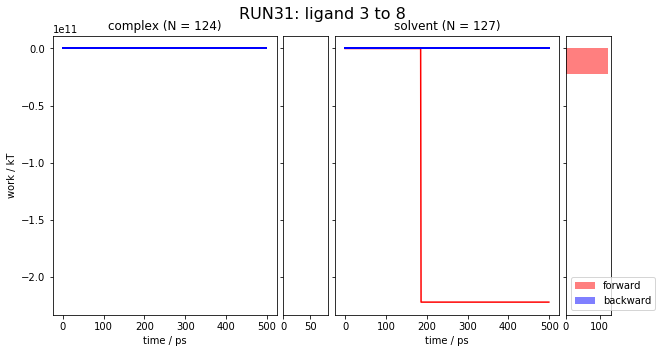

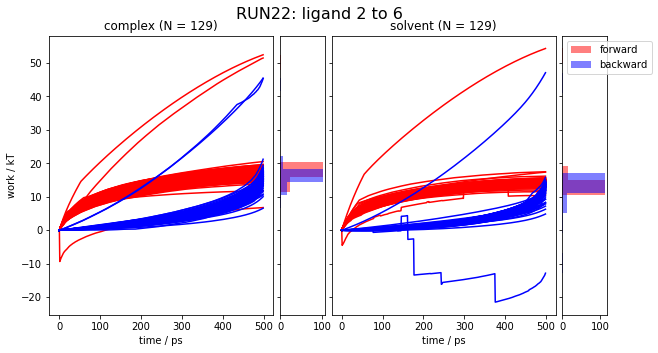

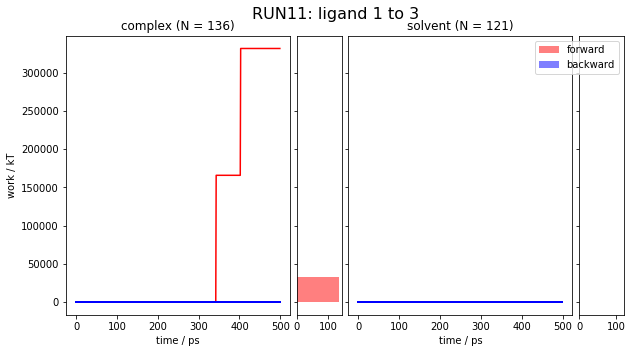

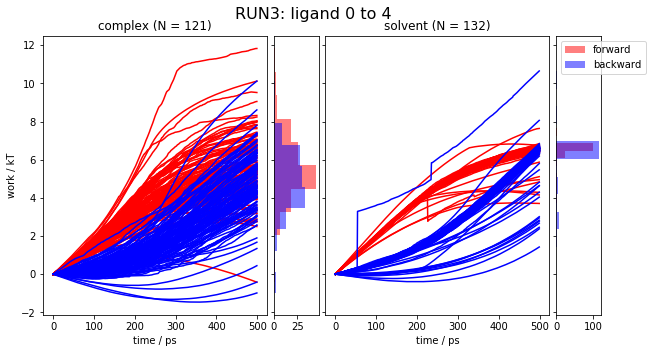

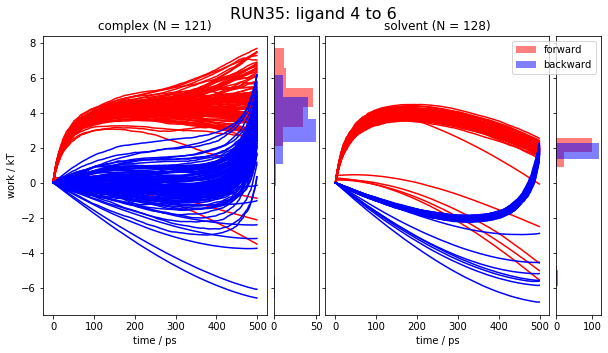

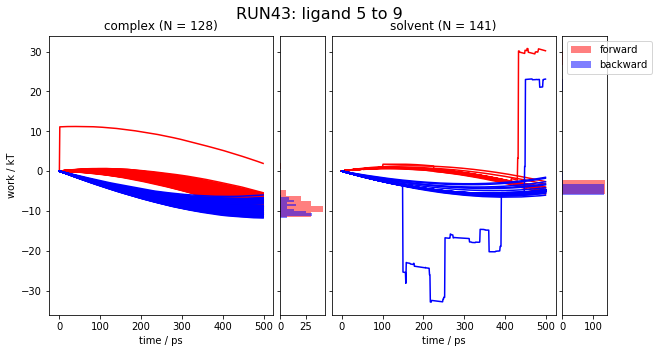

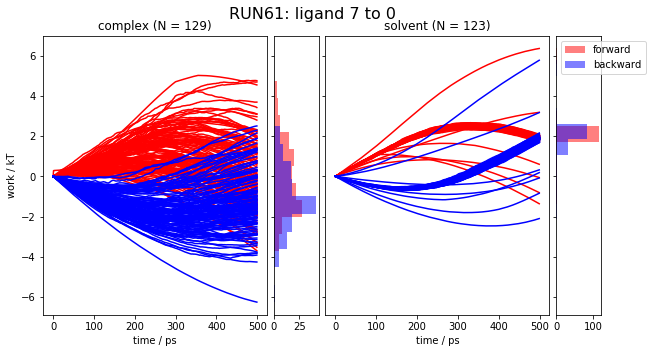

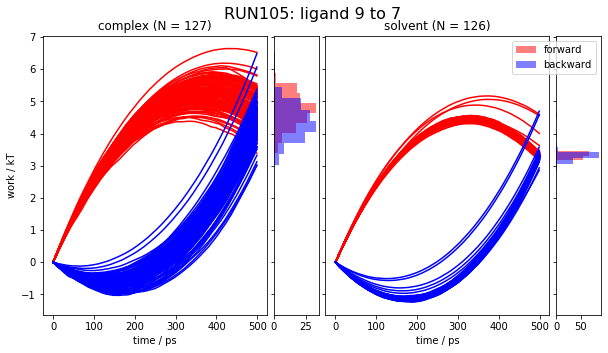

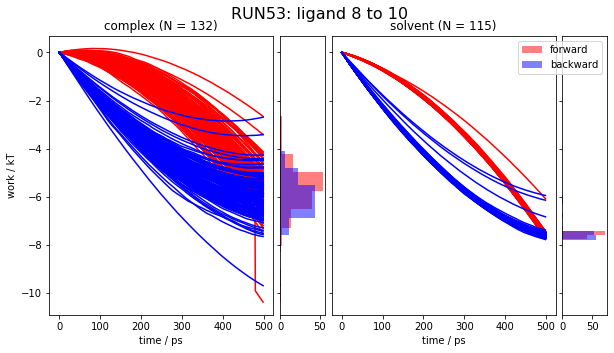

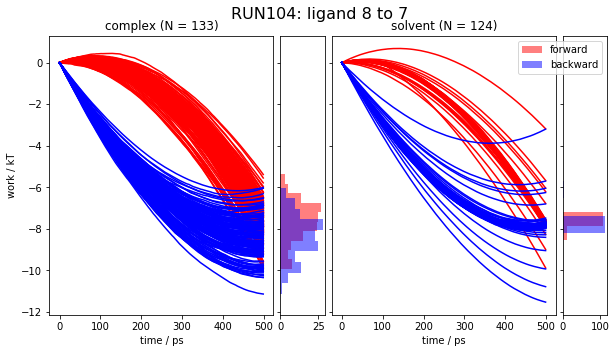

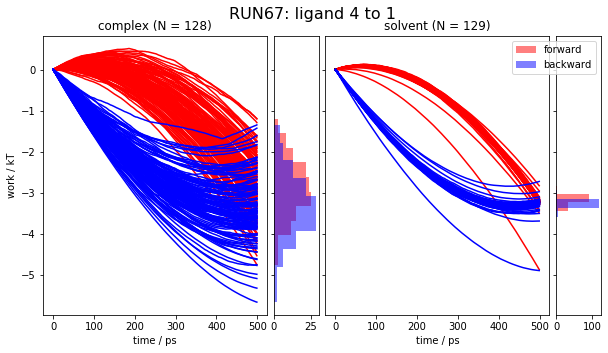

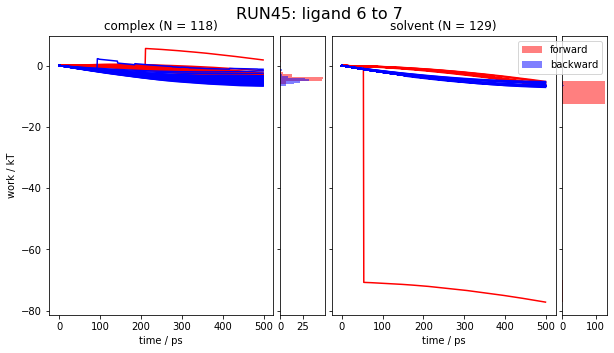

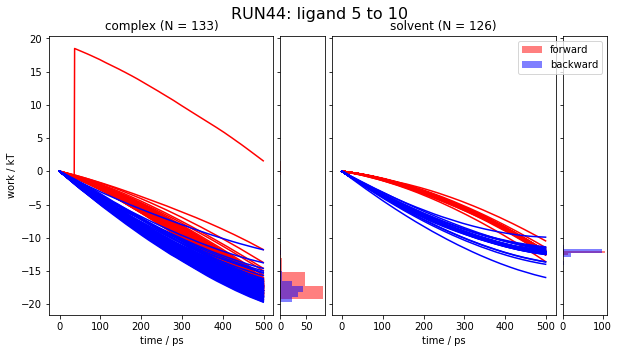

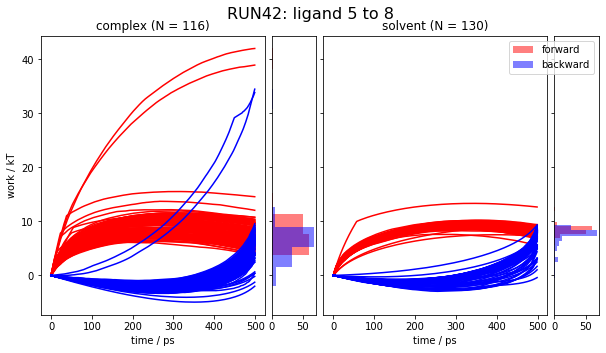

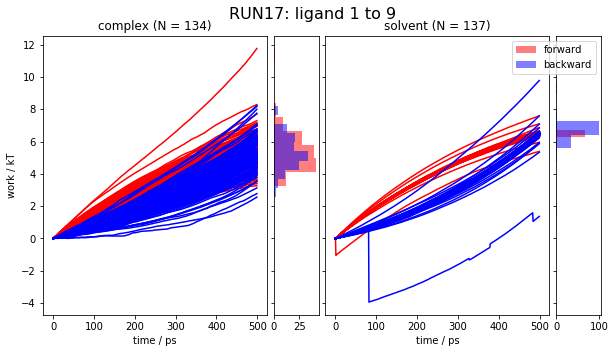

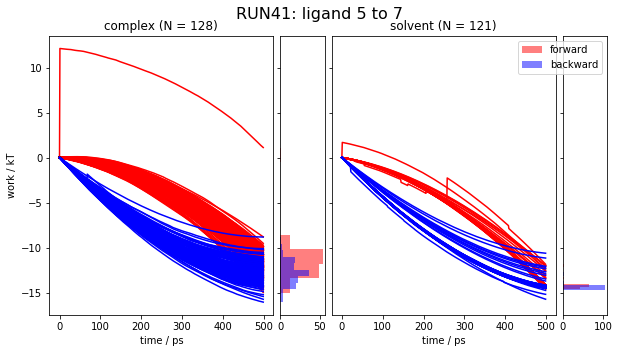

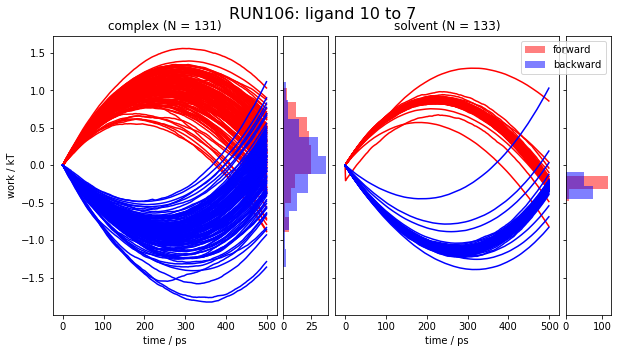

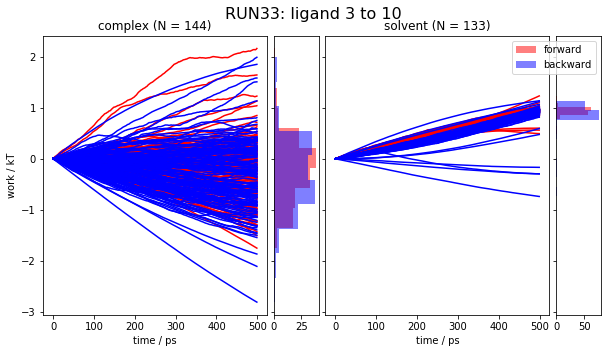

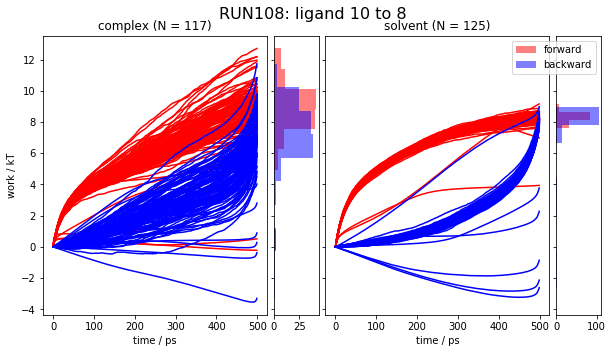

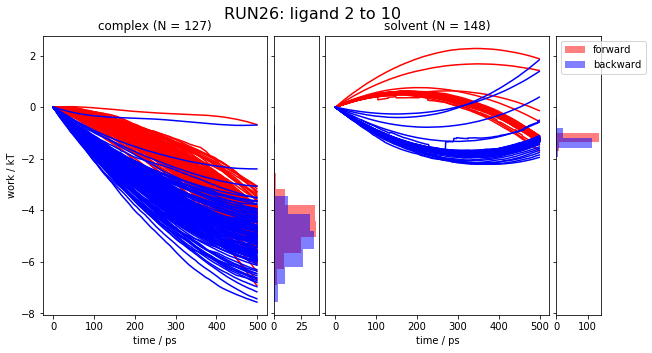

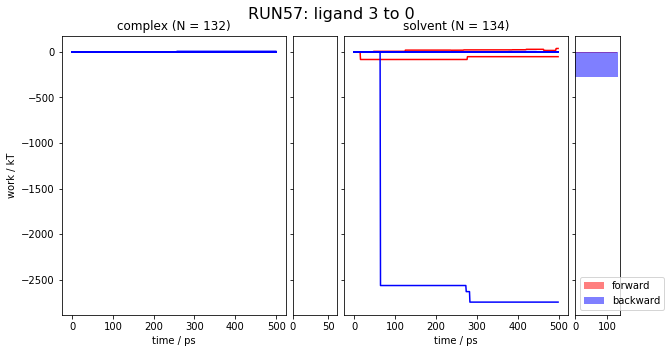

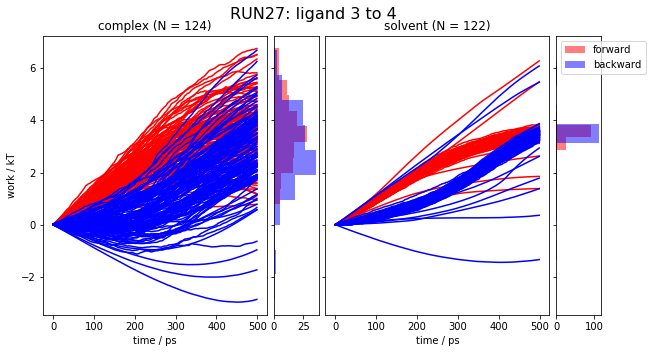

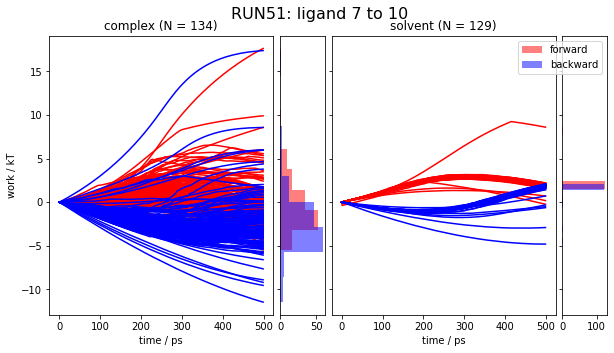

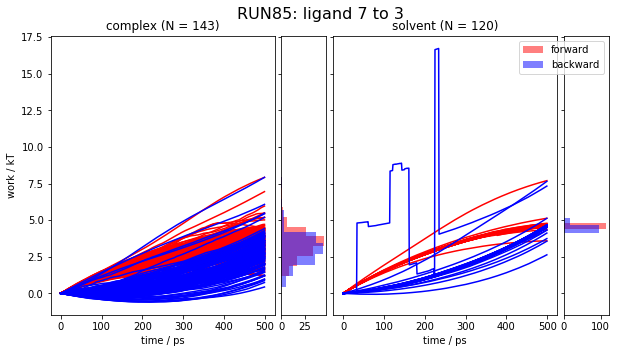

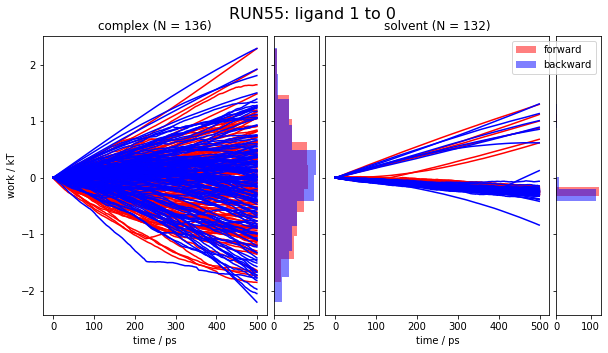

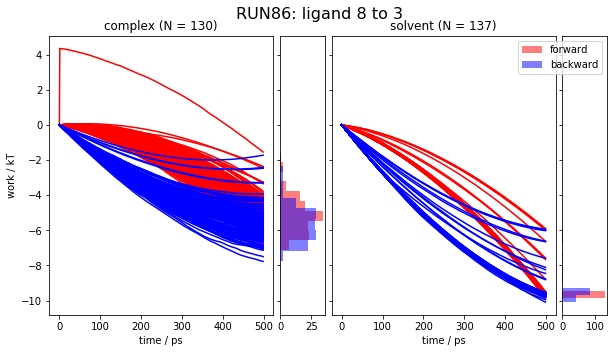

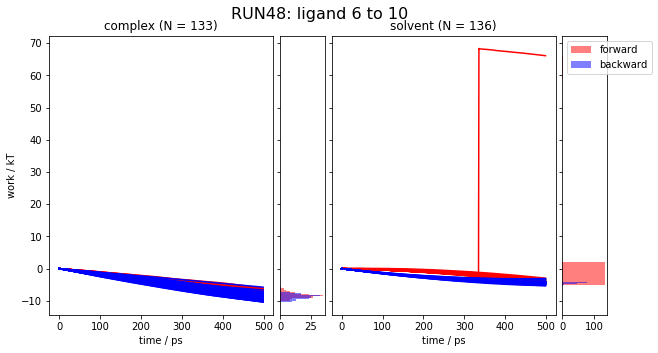

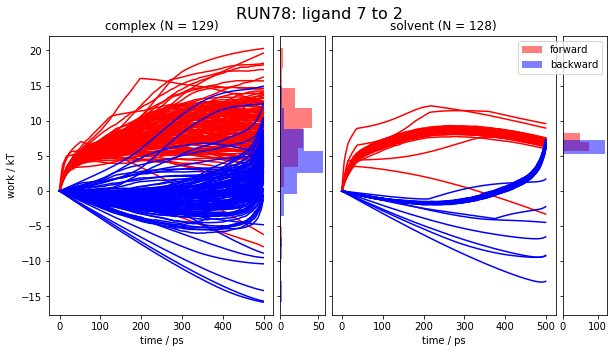

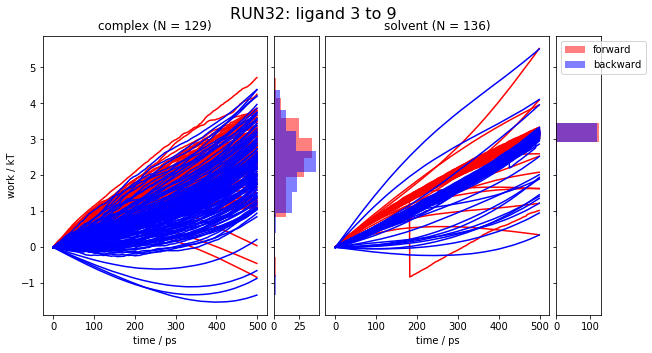

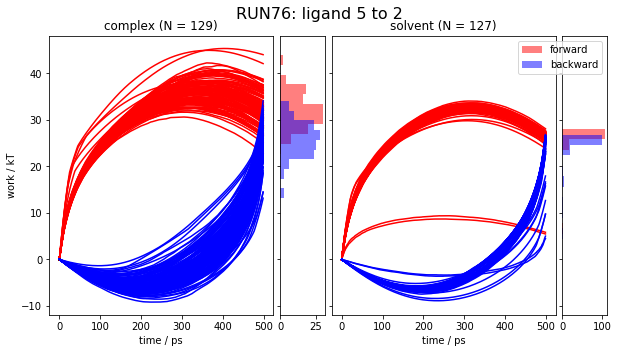

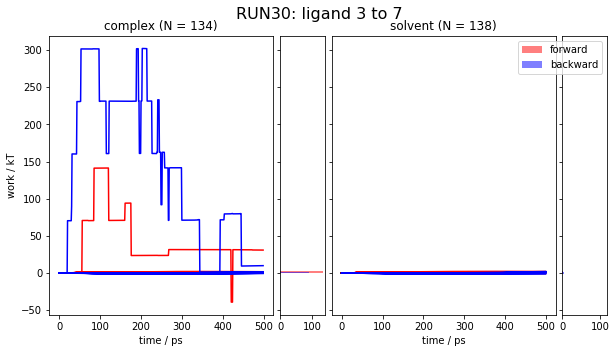

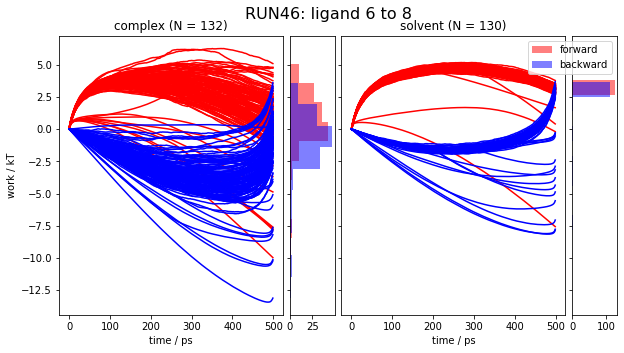

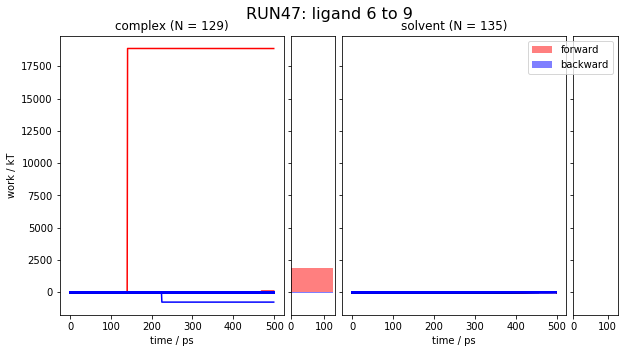

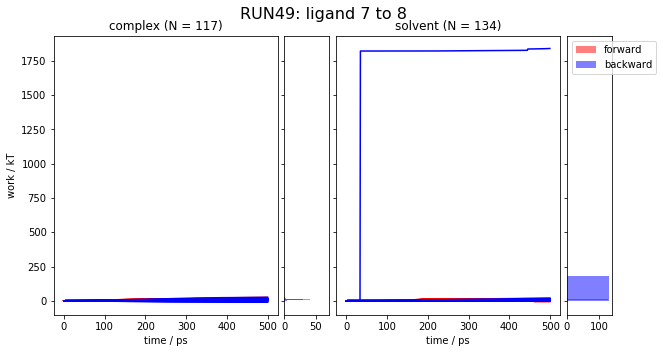

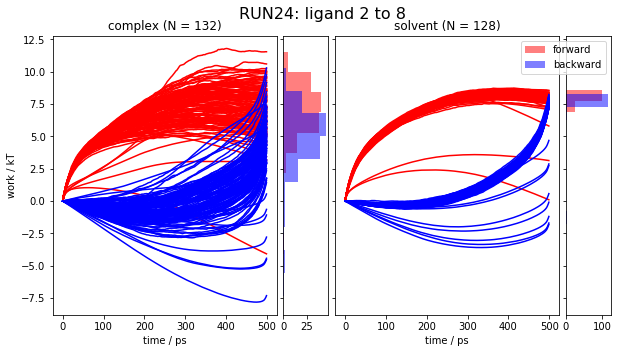

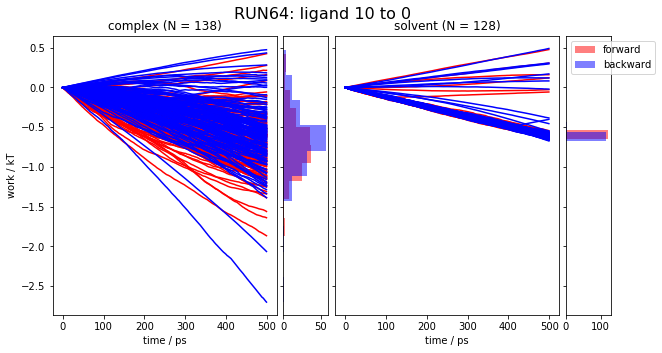

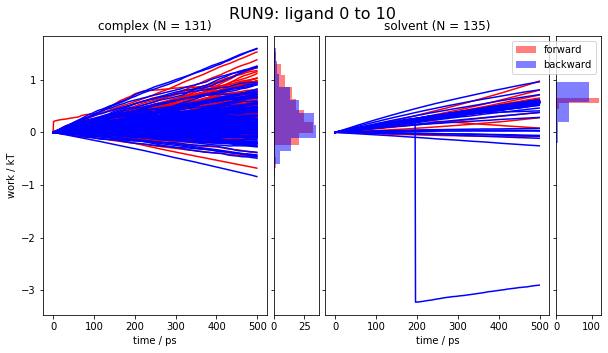

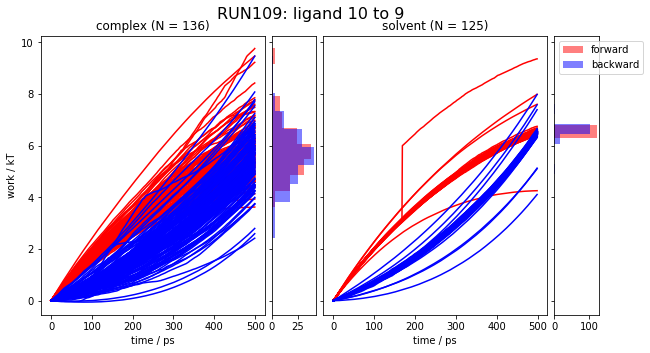

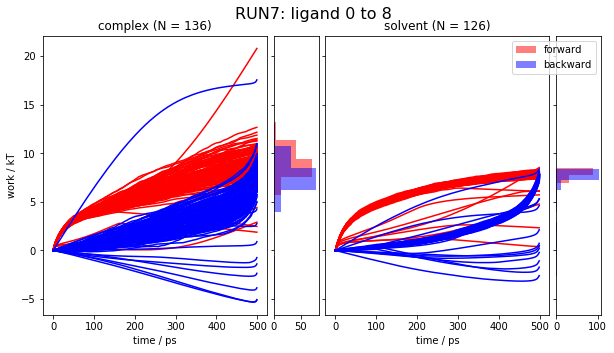

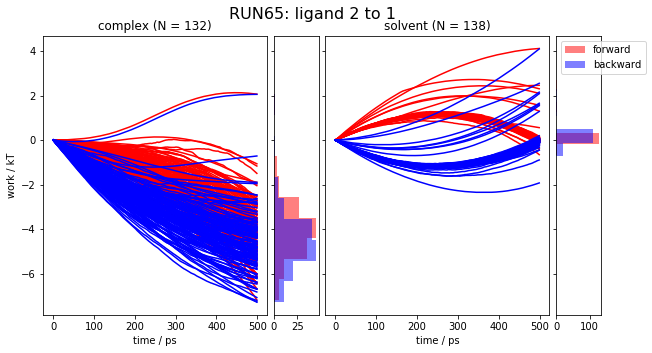

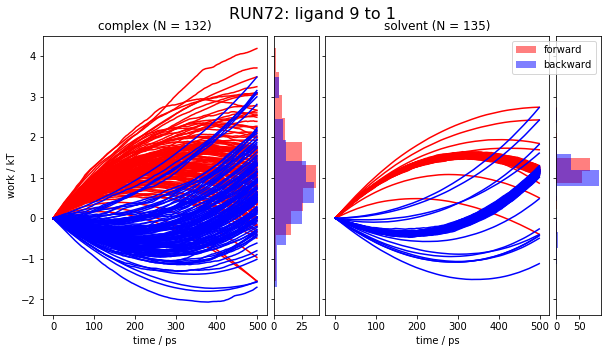

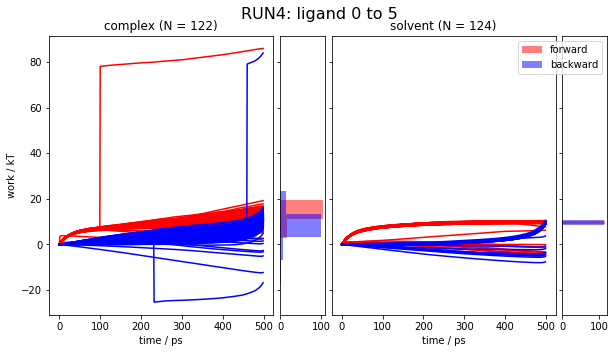

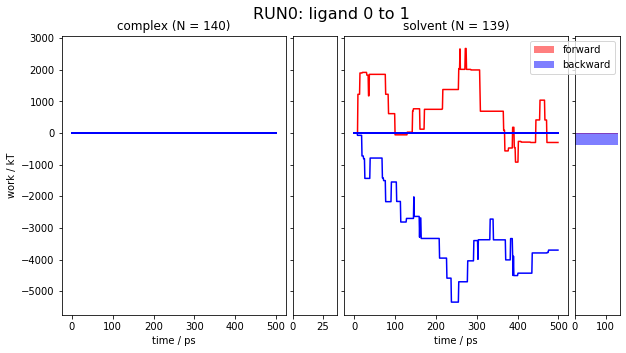

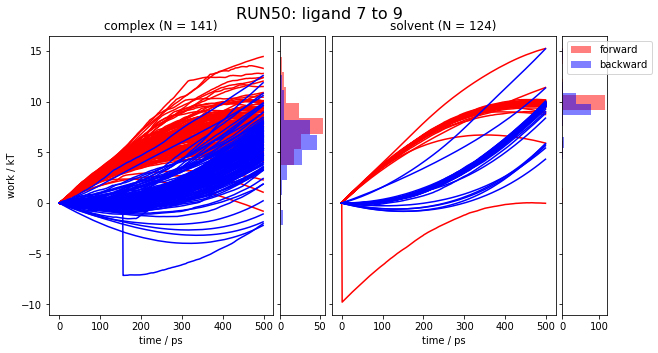

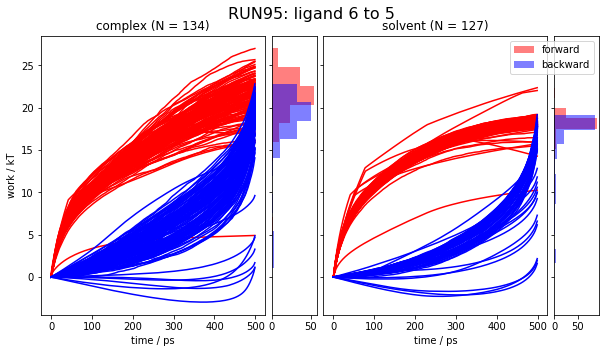

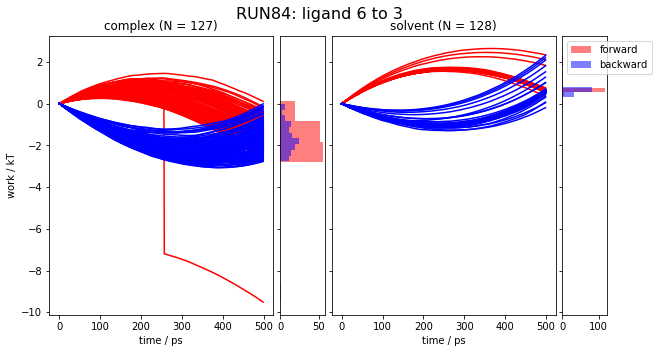

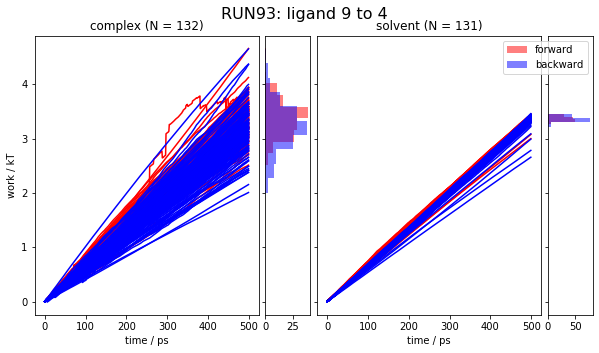

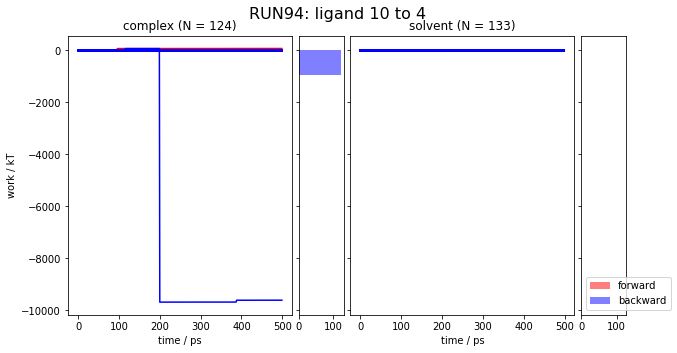

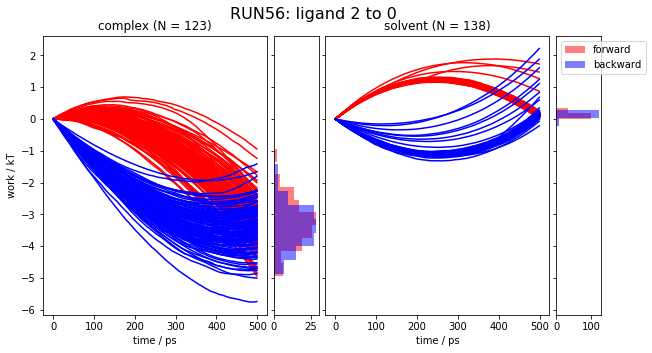

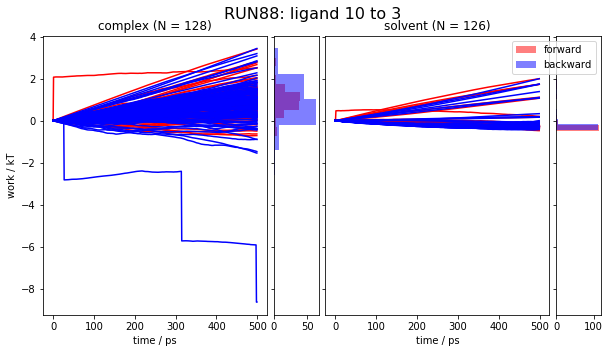

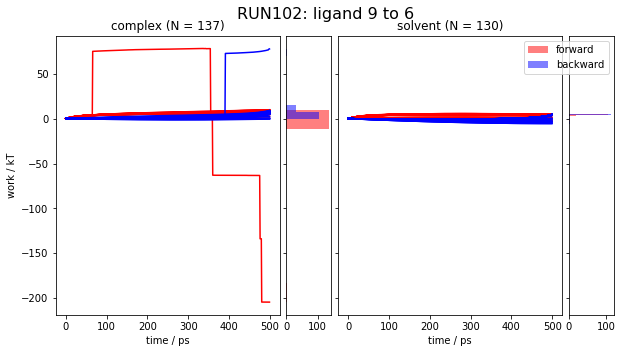

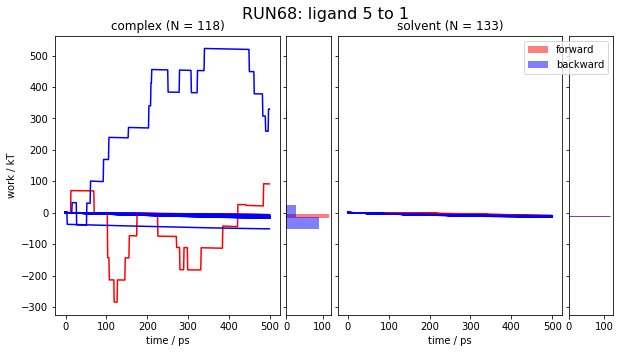

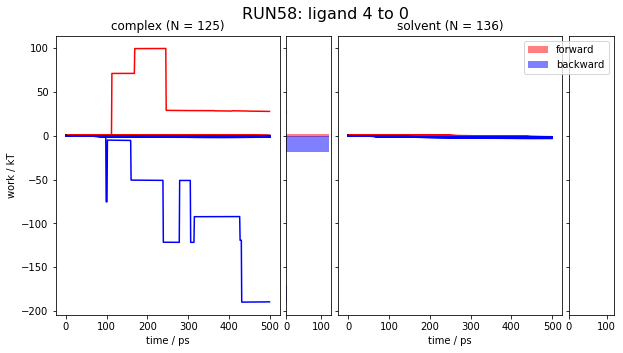

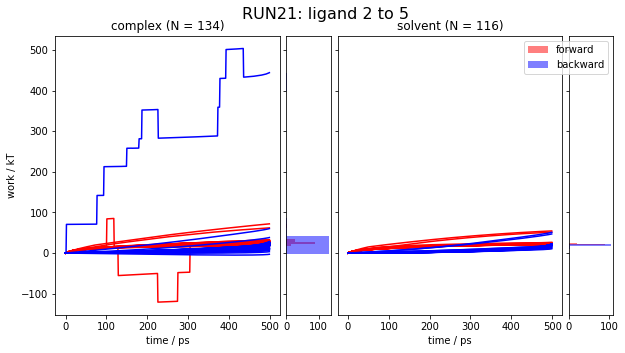

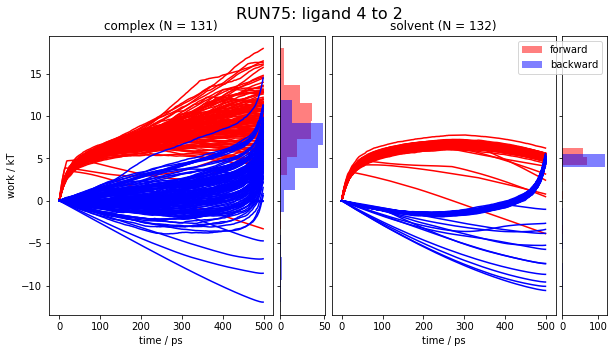

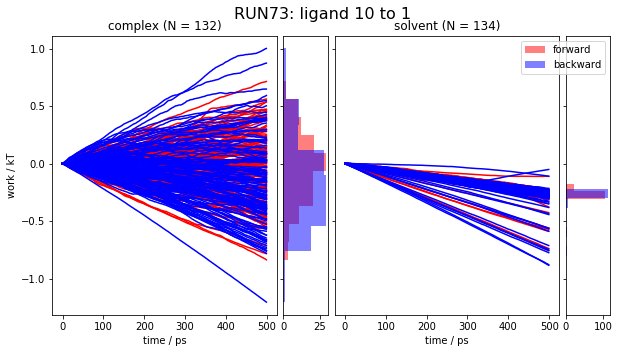

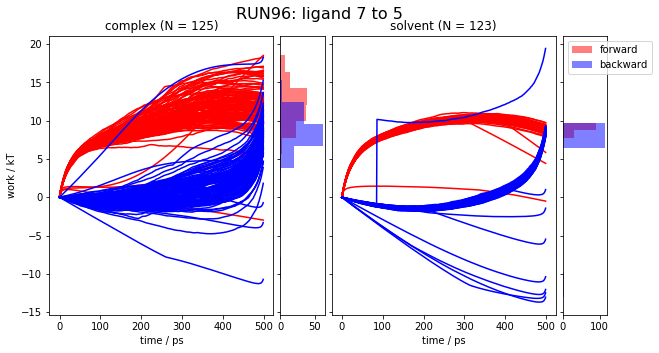

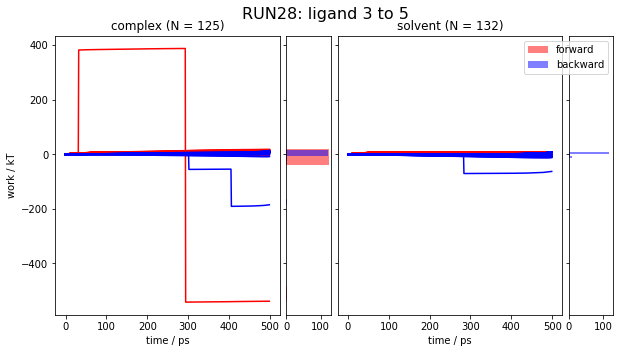

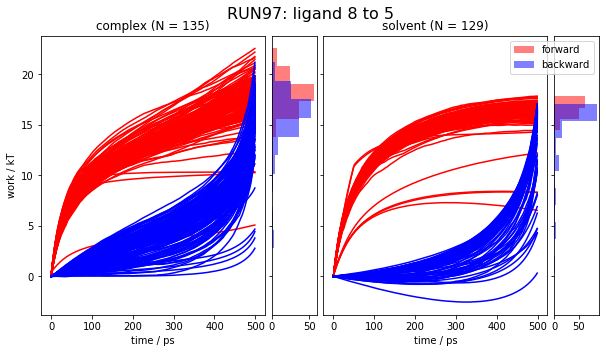

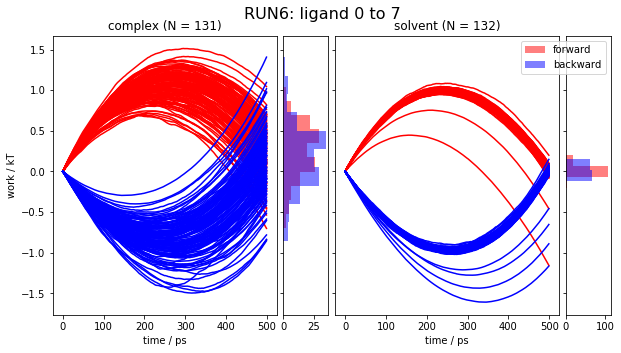

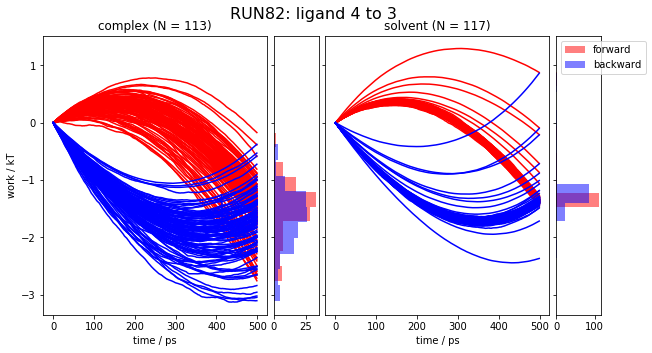

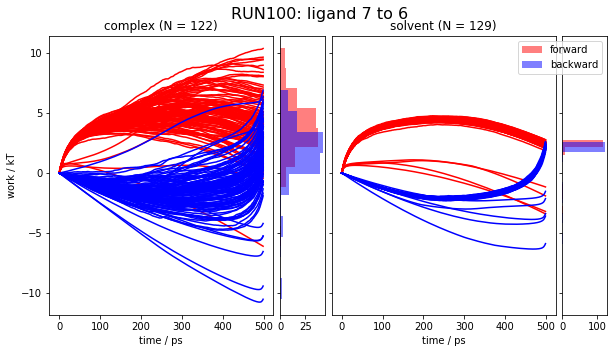

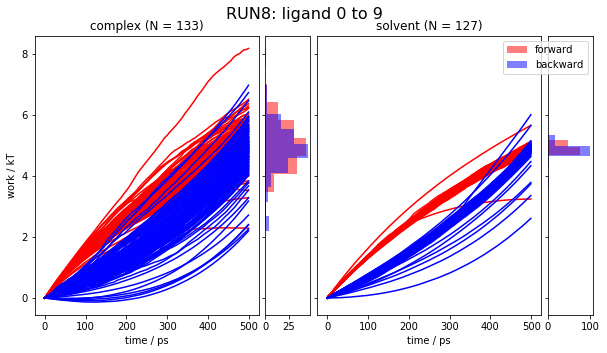

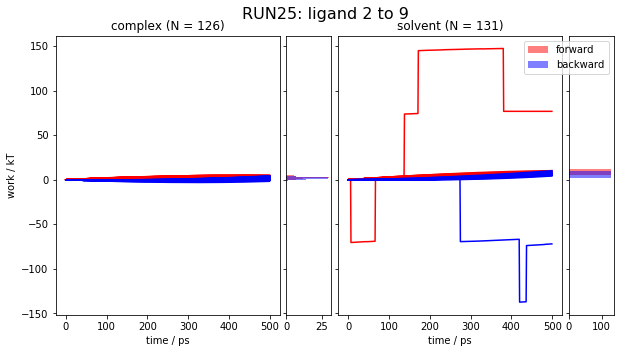

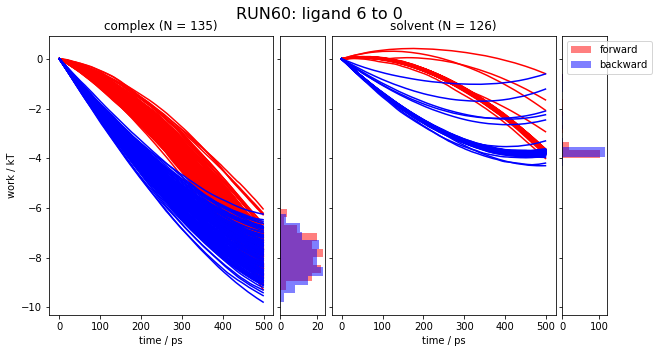

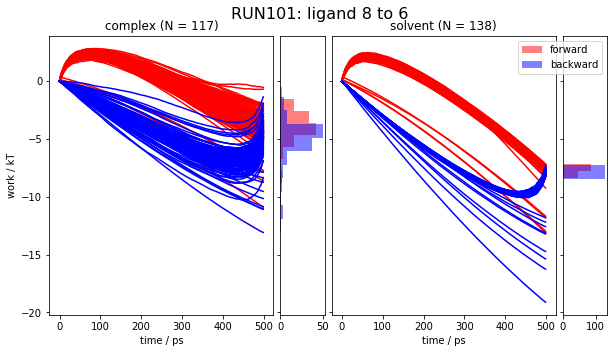

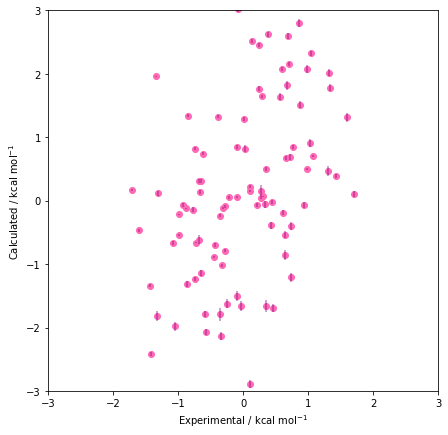

In [20]:
for RUN in work[PROJ]:
    fig, axes = plt.subplots(ncols=4,nrows=1,sharey=True,figsize=(10,5),gridspec_kw={'width_ratios': [5,1,5,1]})

    forward_work_complex = list()
    reverse_work_complex = list()
    for CLONE in work[PROJ][RUN]:
        try:
            protocol_work = work[projects['complex']][RUN][CLONE][GEN]
            forward_work_complex.append(protocol_work[500:1000] - protocol_work[500])
            reverse_work_complex.append(protocol_work[1500:2000] - protocol_work[1500])
        except Exception as e:
            pass
    forward_work = np.array(forward_work_complex)
    reverse_work = np.array(reverse_work_complex)
    complex_fe = BAR(forward_work[:,-1],reverse_work[:,-1])

    ax = axes[0]
    ax.plot(+forward_work.T, 'r-')    
    ax.plot(-reverse_work.T, 'b-')  
    ax.set_xlabel('time / ps')
    ax.set_ylabel('work / kT')
    ax.set_title(f'complex (N = {len(forward_work)})')

    hist_plot = axes[1]
# TODO make histograms prettier
#     maximum = max(np.max(forward_work[:,-1]),np.max(-reverse_work[:,-1]))
#     minimum = max(np.min(forward_work[:,-1]),np.min(-reverse_work[:,-1]))
#     bins = np.linspace(np.floor(minimum),np.ceil(maximum), int(np.ceil(maximum)) - int(np.floor(minimum)) +1 )
    hist_plot.hist(forward_work[:,-1], orientation='horizontal',linewidth=3,color='r',alpha=0.5)    
    hist_plot.hist(-reverse_work[:,-1], orientation='horizontal',linewidth=3,color='b',alpha=0.5)    
    complex_fe = BAR(forward_work[:,-1],reverse_work[:,-1])
    

    forward_work_solvent = list()
    reverse_work_solvent = list()
    for CLONE in work[projects['solvent']][RUN]:
        try:
            protocol_work = work[projects['solvent']][RUN][CLONE][GEN]
            forward_work_solvent.append(protocol_work[500:1000] - protocol_work[500])
            reverse_work_solvent.append(protocol_work[1500:2000] - protocol_work[1500])
        except Exception as e:
            pass 
    forward_work = np.array(forward_work_solvent)
    reverse_work = np.array(reverse_work_solvent)
    solvent_fe = BAR(forward_work[:,-1],reverse_work[:,-1])

    ax = axes[2]
    ax.plot(+forward_work.T, 'r-')    
    ax.plot(-reverse_work.T, 'b-')
    ax.set_xlabel('time / ps')
    ax.set_title(f'solvent (N = {len(forward_work)})')
    
    hist_plot = axes[3]
    hist_plot.hist(forward_work[:,-1], orientation='horizontal',linewidth=3,color='r',alpha=0.5)    
    hist_plot.hist(-reverse_work[:,-1], orientation='horizontal',linewidth=3,color='b',alpha=0.5)       
    solvent_fe = BAR(forward_work[:,-1],reverse_work[:,-1])
    plt.legend(['forward','backward'])
    
    d = details[RUN]
    details[RUN]['calculated'] = solvent_fe[0] - complex_fe[0]
    details[RUN]['calculated_err'] = (solvent_fe[1]**2 + complex_fe[1]**2)**0.5
    fig.suptitle(f"{RUN}: ligand {d['start_ligand']} to {d['end_ligand']}", fontsize=16)
    fig.subplots_adjust(top=0.9,wspace=0.05)
    plt.show()    

In [ ]:
plt.figure(figsize=(7,7))
from simtk.openmm import unit
for d in details.values():
    calc_kcal = (d['calculated']*kT).value_in_unit(unit.kilocalories_per_mole)
    calc_err_kcal = (d['calculated_err']*kT).value_in_unit(unit.kilocalories_per_mole)
    plt.errorbar(d['experimental'],calc_kcal, yerr=calc_err_kcal,color='purple',alpha=0.5)
    plt.scatter(d['experimental'], calc_kcal,color='hotpink')

plt.xlabel('Experimental / kcal mol$^{-1}$')
plt.ylabel('Calculated / kcal mol$^{-1}$')


#### TODO - note that this is cropped... hopefully there will be fewer outliers in future
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

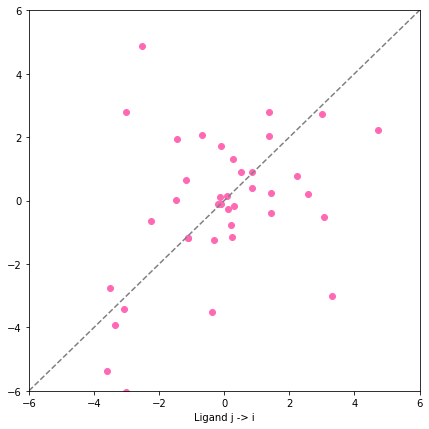

In [18]:
plt.figure(figsize=(7,7))
from simtk.openmm import unit
minimal = {}
for d in details.values():
    minimal[(d['start_ligand'],d['end_ligand'])] = d['calculated']

for i,j in minimal.keys():
    if j > i:
        continue
    if (j,i) in minimal:
        plt.scatter(minimal[i,j], -minimal[j,i],color='hotpink')

plt.plot([-6,6],[-6,6],color='grey',linestyle='--')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xlabel('Ligand i -> j')
plt.xlabel('Ligand j -> i')
plt.show()